In [32]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from dateutil.parser import parse
import glob
import os

In [126]:
project_path='/mnt/c/Users/jacke/Desktop/DatosTranSapp'
trip_file_path = os.path.join(project_path, 'processedTrips.csv')
trips = pd.read_csv(trip_file_path, sep=';')

In [127]:
#leo datos
#df = pd.read_csv('C:\\Users\\jacke\\Desktop\\DatosTranSapp\\Agosto-Febrero\\viajes.csv', index_col=False, header=0, delimiter=";")
#aqui agregar meses que se quieren evaluar
Mes1=3
Mes2=4
Mes3=5

Meses=[Mes1, Mes2, Mes3]

#aqui agregar ano a evaluar
ano=2018

In [128]:
trips['date'] =  pd.to_datetime(trips['date'], format='%Y-%m-%d')

In [129]:
trips['year'] = trips['date'] .dt.year
trips['month'] = trips['date'] .dt.month

In [130]:
trips.groupby(['month', 'year']).size()

month  year
3      2019    18909
4      2019    17205
5      2019    15755
dtype: int64

In [92]:
#viajes que duran 3 o más minutos
df=trips[(trips['duration(min)']>3)].reset_index(drop=True)
df.groupby(['month', 'year']).size()

month  year
3      2019    9875
4      2019    8963
5      2019    8320
dtype: int64

In [93]:
#viajes con distancia mayor a 500 mts.
df=df[(df['distEuclidian(mts)']>500)].reset_index(drop=True)
df.groupby(['month', 'year']).size()

month  year
3      2019    8658
4      2019    7872
5      2019    7313
dtype: int64

In [109]:
df=df[(df['duration(min)']<100)].reset_index(drop=True)
df.groupby(['month', 'year']).size()

month  year
3      2019    6087
4      2019    5615
5      2019    4756
dtype: int64

In [131]:
df=df[(df['evaluation']>0)].reset_index(drop=True)
df.groupby(['month', 'year']).size()

month  year
3      2019    6087
4      2019    5615
5      2019    4756
dtype: int64

In [123]:
df['evaluation'].head()

0    7
1    7
2    7
3    7
4    7
Name: evaluation, dtype: int64

#viajes que contienen evaluación
df=df[(df['evaluation'].notnull())].reset_index(drop=True)
df.groupby(['month']).size()

#viajes que tienen patente distinta a DUMMYLPT
df=df[(df['plate']!='DUMMYLPT')].reset_index(drop=True)
df.groupby(['month']).size()

In [132]:
df1 = df.groupby(by='carrier', as_index=True).agg({'route': pd.Series.nunique})

df2=df.groupby(['carrier']).size()

df3 = df.groupby(by='carrier', as_index=True).agg({'phoneId': pd.Series.nunique})

#df2=pd.DataFrame({'N° dias de uso de transporte publico':df2.index, 'N° de usuarios':df2.values})
#df2

result = pd.concat([df1, df2,df3], axis=1)
result.columns = ['# recorridos', 'N Muestral', 'N Usuarios']
result


,# recorridos,N Muestral,N Usuarios
carrier,,,
Alsacia,5,319,128
Buses Metropolitana,42,4000,1485
Buses Vule,74,3888,1480
Express,45,3290,1204
Red Bus Urbano,49,1710,673
STP Santiago,30,1196,393
Su Bus,40,2055,780


In [42]:
df1 = df.groupby(by='phoneId', as_index=False).agg({'date': pd.Series.nunique})
df2 = df1.groupby(['date']).size()
df2=pd.DataFrame({'N° dias de uso de transporte publico':df2.index, 'N° de usuarios':df2.values})

No se puede obtener el número de días a la semana que el usuario utilizó transporte público.
No se puede obtener el objetivo de actividad del usuario
No se puede obtener el uso de vías exclusivas

In [43]:
df3=df2[df2['N° dias de uso de transporte publico']>=5]
a=df3['N° de usuarios'].sum()
df4=df2[df2['N° dias de uso de transporte publico']<5]
b=df4['N° de usuarios'].sum()

df5 = pd.DataFrame({'5 o más días por semana': [(a/(a+b))*100] , 'Con menor frecuencia': [(b/(a+b))*100]})
df5

,5 o más días por semana,Con menor frecuencia
0,13.014852,86.985148


In [44]:
#genera columna de tiempo de espera en minutos
df['waitingTimeEstimateMin']=df['waitingTimeEstimate'].apply(lambda x: x/60)

In [45]:
#Funcion para graficar barras
def graficar_conjunto(data, titles):
    """
    ejemplo
    data = [{'etiqueta1': 1, 'etiqueta2': 2}, {'etiqueta3': 3}]
    titles = ['titulo1', 'titulo2']
    """
    assert len(data) == len(titles)
    fig, axs = plt.subplots(1, len(data), figsize=(16, 4), sharey=True)
    color = '#7dc242'

    for index, ax in enumerate(axs):
        for i, value in enumerate(data[index].values()):
            ax.text(i - .1, value + 1, str(value) + ' %', color='black')
        ax.bar(data[index].keys(), data[index].values(), color=color)
        ax.set_title(titles[index], fontdict={'fontsize': 20})
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)

        if index > 0:
            ax.spines['left'].set_visible(False)
            ax.tick_params(axis='y', which='both', left=False)

In [46]:
#Datos para graficar tiempo de viaje general
df3=df[df['duration(min)']<=29]['duration(min)']
a=df3.count()

df3=df[(df['duration(min)']>29) & (df['duration(min)']<=59)]['duration(min)']
b=df3.count()

df3=df[(df['duration(min)']>59)]['duration(min)']
c=df3.count()

d=a+b+c

In [47]:
#Datos para graficar tiempo de espera general
df1=df[df['distFirstGPSToBoardingBusStop']<150]
df1=df1[df['carrier']=='Buses Vule']
df3=df1[(df1['waitingTimeEstimateMin']<=5) & (df1['waitingTimeEstimateMin']>=1)]['duration(min)']
e=df3.count()

df3=df1[(df1['waitingTimeEstimateMin']<=10) & (df1['waitingTimeEstimateMin']>5) ]['duration(min)']
f=df3.count()

df3=df1[(df1['waitingTimeEstimateMin']<=15) & (df1['waitingTimeEstimateMin']>10)]['duration(min)']
g=df3.count()

df3=df1[(df1['waitingTimeEstimateMin']<=20) & (df1['waitingTimeEstimateMin']>15)]['duration(min)']
h=df3.count()

df3=df1[(df1['waitingTimeEstimateMin']>20)]['duration(min)']
i=df3.count()
    
j=e+f+g+h+i

/home/jacke/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


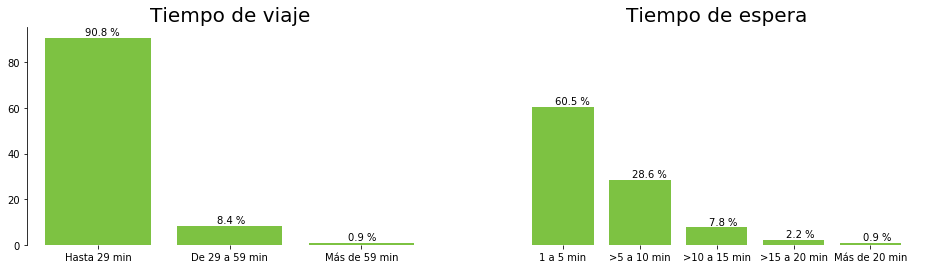

In [48]:
data= [{'Hasta 29 min': round((a/d)*100, 1), 'De 29 a 59 min': round((b/d)*100, 1), 'Más de 59 min': round((c/d)*100,1)}, 
       {'1 a 5 min': round((e/j)*100, 1), '>5 a 10 min': round((f/j)*100,1), '>10 a 15 min': round((g/j)*100,1), '>15 a 20 min': round((h/j)*100,1), 'Más de 20 min': round((i/j)*100,1)} ]
titles= ['Tiempo de viaje', 'Tiempo de espera']
graficar_conjunto(data, titles)

# Gráficos por meses/operadores

In [49]:
Meses=df.month.unique()

In [50]:
from operator import add

def make_stacked_bars(legend, data, names, colors, sample_size=None, avg_waiting_time=None):
    """
    example of inputs:
        legend = ['1 a 5 min', '6 a 10 min', '11 a 15 min', '16 a 20 min', '21 o más']
        data = [[10, 10], [20, 20], [10, 10], [20, 20], [40, 40]]
        names = ["ene-15", "feb-15"]
        sample_size = [5000, 456]
        avg_waiting_time = [14.4, 35]
    """
    # sanity checks
    assert len(legend) == len(data)
    for row in data:
        assert len(row) == len(names)
    if sample_size is not None:
        assert len(sample_size) == len(names)
    if avg_waiting_time is not None:
        assert len(avg_waiting_time) == len(names)

    plt.figure(figsize=(10, 8))
    ax = plt.subplot(111)
    N = len(names)
    ind = range(N)    # the x locations for the groups
    width = 0.35       # the width of the bars: can also be len(x) sequence
    #colors = ['#539e11', '#7DC242', '#f49f5a', 'yellow', 'red']

    rectangles = []
    previous_data = [0 for _ in range(len(names))]
    for index, row in enumerate(data):
        params = {
            'color': colors[index]
        }
        if index != 0:
            previous_data = list(map(add, data[index - 1], previous_data)) 
            params['bottom'] = previous_data
        
        chart = ax.bar(ind, row, width, **params)
        rectangles.append(chart[0])
        
        # values
        for column, value in enumerate(row):
            ax.text(ind[column], previous_data[column] + row[column] / 2, str(value) + ' %', color='black', 
                    horizontalalignment='center', verticalalignment='center')
            # put text once
            if index == 0:
                if sample_size is not None:
                    ax.text(ind[column], -20, "{:,}".format(sample_size[column]), horizontalalignment='center')
                if avg_waiting_time is not None:
                    ax.text(ind[column], 110, "{:,}".format(avg_waiting_time[column]), horizontalalignment='center')

    if sample_size is not None:
        ax.text(-0.7, -20, 'N:')    
    if avg_waiting_time is not None:
        ax.text(-0.8, 111, 'Promedio:', verticalalignment ='center')
    
    ax.legend(rectangles, legend, loc='center', ncol = len(legend), bbox_to_anchor=(0.5, 1.15))
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    
    #plt.ylabel('Porcentaje')
    #plt.title('Tiempo de espera', loc='left')
    plt.xticks(ind, names)
    
    plt.show()

In [51]:
df['waitingTimeEstimateMin']=df[['waitingTimeEstimate']].apply(lambda x: x[0]/60, axis=1)

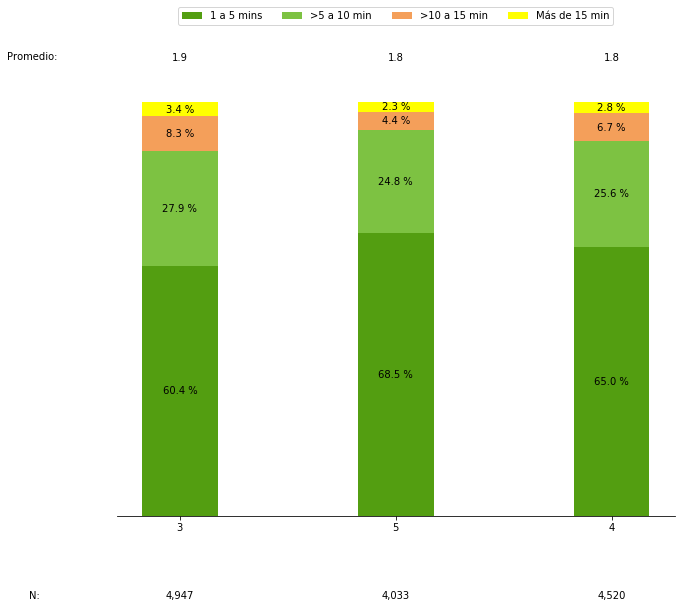

In [52]:
#Datos para tiempo de espera por mes
esperas=[]
df1=df[df['distFirstGPSToBoardingBusStop']<150]
df=df[df['carrier']=='Red Bus Urbano']
leyenda = ['1 a 5 mins', '>5 a 10 min', '>10 a 15 min', 'Más de 15 min']
observaciones=[]
data = [[0 for _ in range(len(Meses))] for _ in range(len(leyenda))]
criteria = [(5, 1),(10, 5),(15, 10),(float('inf'), 15)]

for month_index, i in enumerate(Meses):
    percentages = []
    for max_value, min_value in criteria:
        df3=df1[(df1['waitingTimeEstimateMin']<=max_value) & (df1['waitingTimeEstimateMin']>=min_value) & (df1['month']==i)]['duration(min)']
        value=df3.count()
        percentages.append(value)
    
    for index, percentage in enumerate(percentages):
        data[index][month_index] = round((percentage/sum(percentages)) * 100, 1)
    
    observacion = df1[(df1['month']==i)]['duration(min)'].count()
    observaciones.append((round(observacion, 1)))
    promedio=df1.groupby('month').agg({'waitingTimeEstimateMin':['mean']})
    #promedio=promedio.tolist()
    
promedio_array = promedio['waitingTimeEstimateMin'].get_values()
promedio_list = list(map(lambda x: round(x, 1), promedio_array[:,0].tolist()))
colors = ['#539e11', '#7DC242', '#f49f5a', 'yellow', 'red']

make_stacked_bars(leyenda, data, Meses, colors, sample_size=observaciones, avg_waiting_time=promedio_list)

In [53]:
#Datos para tiempo de viaje por mes
Meses=[8,9,10,11,12,1,2]
tpo_viajes=[]
observaciones=[]
leyenda = ['10 min o menos', '>10 a 29 min', '>29 a 44 min', 'Más de 44 min']
data = [[0 for _ in range(len(Meses))] for _ in range(len(leyenda))]
criteria = [(10, 0),(29, 10),(44, 29),(float('inf'), 44)]
df=df[(df['carrier']=='Red Bus Urbano') & (df['evaluation_mod']>0)]
for month_index, i in enumerate(Meses):
    percentages = []
    for max_value, min_value in criteria:
        df3=df[(df['duration(min)']<=max_value) & (df['duration(min)']>=min_value) & (df['month']==i)]['duration(min)']
        value=df3.count()
        percentages.append(value)
    
    for index, percentage in enumerate(percentages):
        data[index][month_index] = round((percentage/sum(percentages)) * 100, 1)
        
    observacion = df[(df['month']==i)]['duration(min)'].count()
    observaciones.append((round(observacion, 1)))
    promedio=df.groupby('month').agg({'duration(min)':['mean']})

promedio_array = promedio['duration(min)'].get_values()
promedio_list = list(map(lambda x: round(x, 1), promedio_array[:,0].tolist()))
colors = ['#539e11', '#7DC242', '#f49f5a', 'yellow', 'red']
names = ["08-2018", "09-2018", "10-2018", "11-2018", "12-2018", "01-2019", "02-2019"]
make_stacked_bars(leyenda, data, names, colors, sample_size=observaciones, avg_waiting_time= promedio_list)

KeyError: 'evaluation_mod'

In [54]:
data

[[0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0]]

In [55]:
Meses.sort()
Meses

[1, 2, 8, 9, 10, 11, 12]

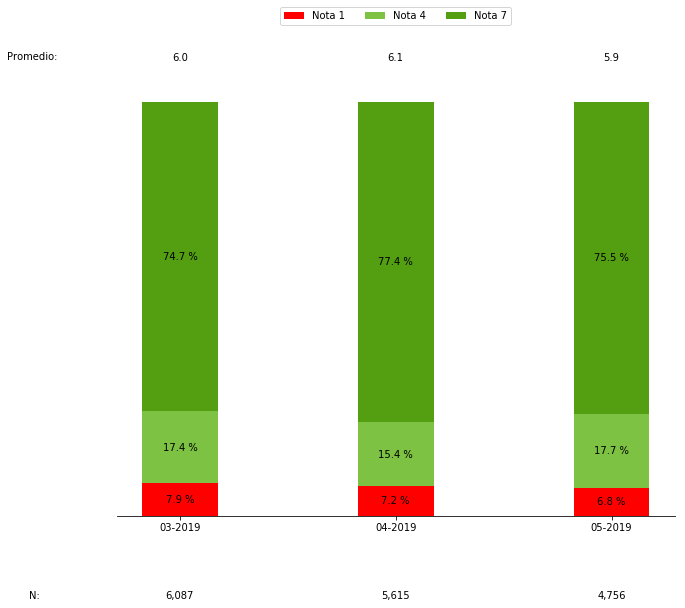

In [76]:
#Datos para evaluaciones por mes

Mes1=3
Mes2=4
Mes3=5

Meses=[Mes1, Mes2, Mes3]

evaluaciones=[]
observaciones=[]
leyenda = ['Nota 1', 'Nota 4', 'Nota 7']
data = [[0 for _ in range(len(Meses))] for _ in range(len(leyenda))]
criteria = [1,4,7]

for month_index, i in enumerate(Meses):
    percentages = []
    for max_value in criteria:
        df3=df[(df['evaluation']==max_value) & (df['month']==i) & (df['evaluation']>0)]['duration(min)']
        value=df3.count()
        percentages.append(value)
    
    for index, percentage in enumerate(percentages):
        data[index][month_index] = round((percentage/sum(percentages)) * 100, 1)
        
    observacion = df[(df['month']==i)& (df['evaluation']>0)]['duration(min)'].count()
    observaciones.append((round(observacion, 1)))
    promedio=df[df['evaluation']>0].groupby('month').agg({'evaluation':['mean']})

promedio_array = promedio['evaluation'].get_values()
promedio_list = list(map(lambda x: round(x, 1), promedio_array[:,0].tolist()))
colors = ['red', '#7DC242', '#539e11']

names = ["03-2019", "04-2019", "05-2019"]
make_stacked_bars(leyenda, data, names, colors, sample_size=observaciones, avg_waiting_time=promedio_list)


In [133]:
df['evaluation_mod']=df[['evaluation']].apply(lambda x: 2 if x[0]<=3.0 else (4 if x[0]==4.0 else (6 if x[0]>=5.0 else 0 )), axis=1)

In [29]:
df_gral=df

In [30]:
df_gral.shape

(3666, 34)

In [156]:
df=df_gral[df_gral['route']=='103']

In [29]:
Meses=[8,9,10,11,12,1,2]

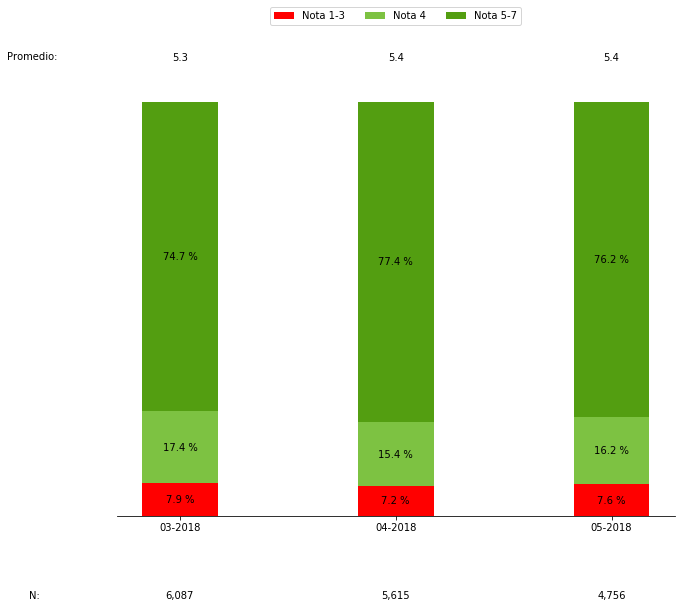

In [136]:
#Datos para evaluaciones por mes con escala modificada y con encuesta 
#Meses=[Mes1, Mes2, Mes3]
evaluaciones=[]
observaciones=[]
promedio_list=[]
leyenda = ['Nota 1-3', 'Nota 4', 'Nota 5-7']
data = [[0 for _ in range(len(Meses))] for _ in range(len(leyenda))]
criteria = [2,4,6]

for month_index, i in enumerate(Meses):
    percentages = []
    for max_value in criteria:
        df3=df[(df['evaluation_mod']==max_value) & (df['month']==i) & (df['evaluation_mod']>0)]['duration(min)']
        value=df3.count()
        percentages.append(value)
    
    for index, percentage in enumerate(percentages):
        data[index][month_index] = round((percentage/sum(percentages)) * 100, 1)
        
    observacion = df[(df['month']==i)& (df['evaluation_mod']>0)]['duration(min)'].count()
    observaciones.append((round(observacion, 1)))
    promedio=df[(df['evaluation_mod']>0) & (df['month']==i)]['evaluation_mod']
    #promedio=promedio[promedio['month']==i].tolist()
    promedio = round(sum(promedio)/len(promedio),1)
    promedio_list.append(promedio)

#promedio_array = promedio['evaluation_mod'].get_values()
#promedio_list = list(map(lambda x: round(x, 1), promedio_array[:,0].tolist()))
colors = ['red', '#7DC242', '#539e11']

#inicio borrar para sacar la encuesta
#data[2][3]=70.1
#data[1][3]=18.3
#data[0][3]=11.6

#observaciones.append((5200))
#promedio_list.append(4.9)

#fin borrar para sacar la encuesta
names = ["03-2018", "04-2018", "05-2018"]
make_stacked_bars(leyenda, data, names, colors, sample_size=observaciones, avg_waiting_time=promedio_list)

# Mejores 5 servicios evaluados por los usuarios

In [79]:
from collections import defaultdict
df=df_gral[(df_gral['evaluation_mod']>0)&((df_gral['month']==2)|(df_gral['month']==1))]
a = defaultdict(list)
b = defaultdict(list)
for idx, row in df.iterrows():
    servicio=row['route']
    evaluacion=row['evaluation_mod']
    a[servicio].append(evaluacion)
    
for llave in a:
    b[llave]=[sum(a[llave])/len(a[llave]), len(a[llave])]

In [32]:
sorted(b.items(), key=lambda v: v[1], reverse=True)

[('F19', [6.0, 22]),
 ('J16', [6.0, 19]),
 ('H02', [6.0, 18]),
 ('E08', [6.0, 13]),
 ('B01', [6.0, 12]),
 ('H05', [6.0, 11]),
 ('F16', [6.0, 7]),
 ('I22', [6.0, 6]),
 ('G02', [6.0, 6]),
 ('F15', [6.0, 6]),
 ('B24', [6.0, 5]),
 ('I17', [6.0, 5]),
 ('F26', [6.0, 4]),
 ('G12', [6.0, 3]),
 ('D01', [6.0, 2]),
 ('346N', [6.0, 1]),
 ('I08N', [6.0, 1]),
 ('109N', [6.0, 1]),
 ('C17', [6.0, 1]),
 ('D20', [6.0, 1]),
 ('B15', [6.0, 1]),
 ('I20', [5.933333333333334, 30]),
 ('H03', [5.913043478260869, 23]),
 ('H12', [5.913043478260869, 23]),
 ('121', [5.9, 40]),
 ('H09', [5.875, 16]),
 ('C09', [5.870967741935484, 31]),
 ('B14', [5.866666666666666, 60]),
 ('G01', [5.866666666666666, 15]),
 ('501', [5.842105263157895, 38]),
 ('J04', [5.833333333333333, 12]),
 ('F03', [5.828571428571428, 35]),
 ('H07', [5.809523809523809, 63]),
 ('E03', [5.7894736842105265, 57]),
 ('D08', [5.777777777777778, 18]),
 ('712', [5.773584905660377, 159]),
 ('I04', [5.773584905660377, 53]),
 ('126', [5.769230769230769, 26]),


In [34]:
notas = pd.DataFrame([(k, v[0], v[1]) for k, v in b.items()], 
                   columns=['servicio', 'nota', 'observaciones'])

In [36]:
notas=notas[notas['observaciones']>49]

In [37]:
notas.shape

(74, 3)

In [38]:
notas.to_csv("notas_ene_feb.csv", encoding='utf-8', index=False, sep=',')

In [81]:
df=df[df['evaluation_mod']>0]

In [101]:
df.shape

(16458, 33)

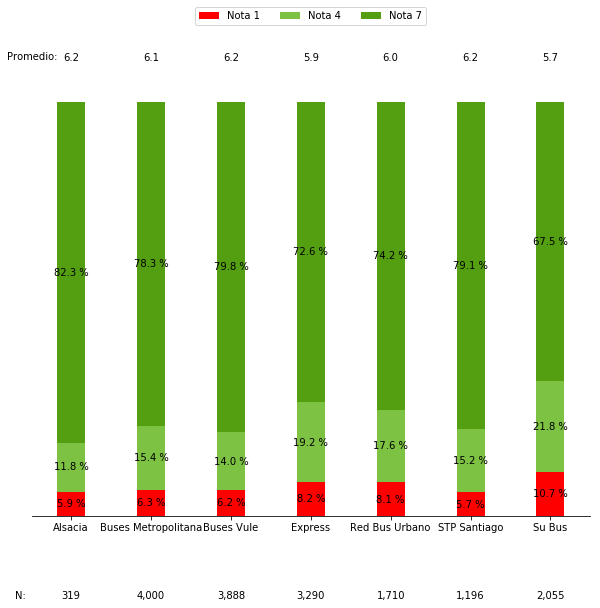

In [102]:
#Datos para evaluaciones por operador
operadores=sorted(list(df.carrier.unique()))
evaluaciones=[]
observaciones=[]
leyenda = ['Nota 1', 'Nota 4', 'Nota 7']
data = [[0 for _ in range(len(operadores))] for _ in range(len(leyenda))]
criteria = [1,4,7]

for month_index, i in enumerate(operadores):
    percentages = []
    for max_value in criteria:
        df3=df[(df['evaluation']==max_value) & (df['carrier']==i)]['duration(min)']
        value=df3.count()
        percentages.append(value)
    
    for index, percentage in enumerate(percentages):
        data[index][month_index] = round((percentage/sum(percentages)) * 100, 1)
        
    observacion = df[(df['carrier']==i)]['duration(min)'].count()
    observaciones.append((round(observacion, 1)))
    promedio=df.groupby('carrier').agg({'evaluation':['mean']})

promedio_array = promedio['evaluation'].get_values()
promedio_list = list(map(lambda x: round(x, 1), promedio_array[:,0].tolist()))
colors = ['red', '#7DC242', '#539e11']

make_stacked_bars(leyenda, data, operadores, colors, sample_size=observaciones, avg_waiting_time=promedio_list)



In [68]:
Meses

array([ 1,  2,  8,  9, 10, 11, 12])

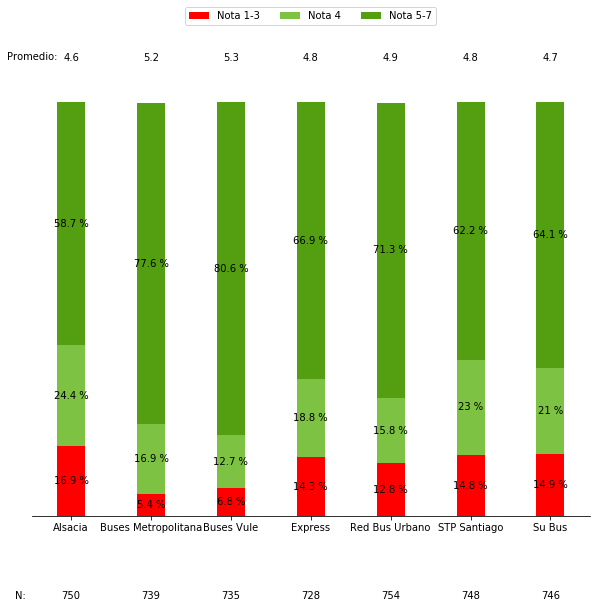

In [137]:
#notas por operador de encuesta

legend = ['Nota 1-3', 'Nota 4', 'Nota 5-7']
data = [[16.9, 5.4, 6.8, 14.3, 12.8, 14.8, 14.9], [24.4, 16.9, 12.7, 18.8, 15.8, 23, 21], [58.7, 77.6, 80.6, 66.9, 71.3, 62.2, 64.1]]
names = sorted(list(df.carrier.unique()))
sample_size = [750, 739, 735, 728, 754, 748, 746]
avg_waiting_time = [4.6, 5.2, 5.3, 4.8, 4.9, 4.8, 4.7]

make_stacked_bars(legend, data, names, colors, sample_size=sample_size, avg_waiting_time=avg_waiting_time)

In [179]:
df=df_gral[(df_gral['month']==1) | (df_gral['month']==2) ]

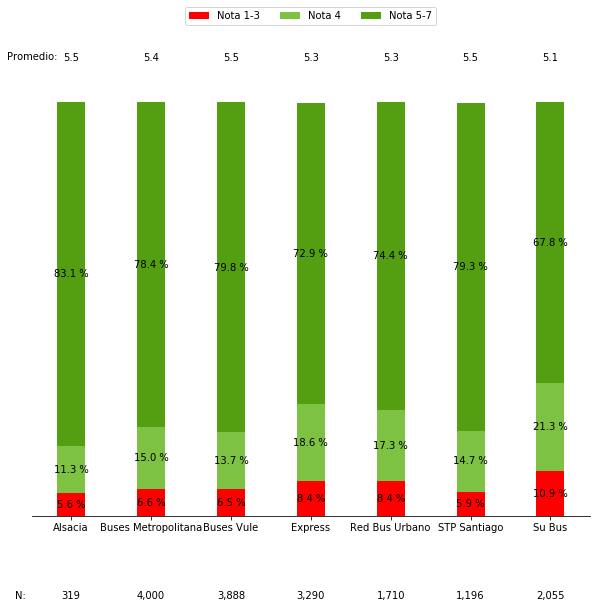

In [138]:
#Datos para evaluaciones por operador con escala modificada
operadores=sorted(list(df.carrier.unique()))
evaluaciones=[]
observaciones=[]
leyenda = ['Nota 1-3', 'Nota 4', 'Nota 5-7']
data = [[0 for _ in range(len(operadores))] for _ in range(len(leyenda))]
criteria = [2,4,6]

for month_index, i in enumerate(operadores):
    percentages = []
    for max_value in criteria:
        df3=df[(df['evaluation_mod']==max_value) & (df['carrier']==i)]['duration(min)']
        value=df3.count()
        percentages.append(value)
    
    for index, percentage in enumerate(percentages):
        data[index][month_index] = round((percentage/sum(percentages)) * 100, 1)
        
    observacion = df[(df['carrier']==i)]['duration(min)'].count()
    observaciones.append((round(observacion, 1)))
    promedio=df.groupby('carrier').agg({'evaluation_mod':['mean']})
    
promedio_array = promedio['evaluation_mod'].get_values()
promedio_list = list(map(lambda x: round(x, 1), promedio_array[:,0].tolist()))
colors = ['red', '#7DC242', '#539e11']

make_stacked_bars(leyenda, data, operadores, colors, sample_size=observaciones, avg_waiting_time=promedio_list)


In [64]:
sorted(list(df.carrier.unique()))

['Alsacia',
 'Buses Metropolitana',
 'Buses Vule',
 'Express',
 'Red Bus Urbano',
 'STP Santiago',
 'Su Bus']

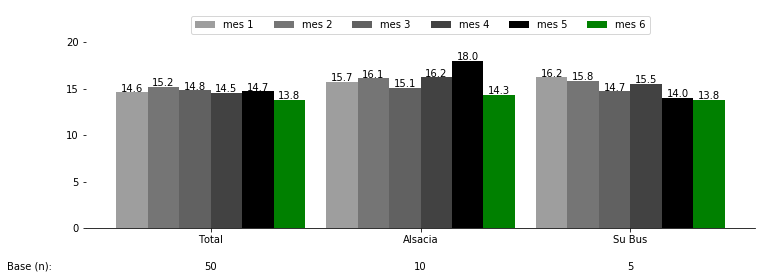

In [65]:
#funcion para hacer grafico por operador y por mes
import matplotlib.pyplot as plt

def make_chart3(x_labels, legend, data, colors, sample_size=None):
    assert len(x_labels) == len(data)
    for row in data:
        assert len(row) == len(colors)
    assert len(legend) == len(colors)
    if sample_size is not None:
        assert len(x_labels) == len(sample_size)
    
    plt.figure(figsize=(12, 4))
    ax = plt.subplot(111)
    
    bar_width = 0.6
    start = 0
    step = int(bar_width * len(data[0])) + 1
    stop = step * len(x_labels)
    base_positions = list(range(start, stop, step))
    
    rectangles = []
    y_max = 0
    for i, row in enumerate(data):
        y_max = max(row) if max(row) > y_max else y_max
        positions = [base_positions[i] + k * bar_width for k in range(len(row))]
        rectangles = ax.bar(positions, row, bar_width, color=colors)
        
        for j, value in enumerate(row):
            ax.text(base_positions[i] + j * bar_width, value + 0.1, str(value), color='black', horizontalalignment='center')
        
    #ax.set_title('Tiempo de espera', fontdict={'fontsize': 18})
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    #ax.axes.get_yaxis().set_visible(False)

    ax.set_xticklabels(x_labels)
    x_ticks_positions = list(map(lambda x: x + bar_width * (len(legend) - 1) / 2, base_positions))
    ax.set_xticks(x_ticks_positions)
    
    ax.legend(rectangles, legend, loc='upper center', ncol = len(legend))#, bbox_to_anchor=(0.5, 1.25))
    ax.set_ylim([0, y_max * 1.3])
    
    if sample_size is not None:
        x_max = ax.get_xlim()[1]
        x_base_position = x_max * -0.2
        y_sample_position = y_max * -0.25
        ax.text(x_base_position, y_sample_position, 'Base (n):')  
        
        # put text once
        for j, sample in enumerate(sample_size):
            ax.text(x_ticks_positions[j], y_sample_position, "{:,}".format(sample_size[j]), horizontalalignment='center')
########################################################################
# EXAMPLE
########################################################################
data = [
    [14.6, 15.2, 14.8, 14.5, 14.7, 13.8], # total
    [15.7, 16.1, 15.1, 16.2, 18.0, 14.3], # Alsacia
    [16.2, 15.8, 14.7, 15.5, 14.0, 13.8]  # Su Bus
    # mes1, mes2, mes3, mes4, mes5, mes6
]
x_labels = ['Total' ,'Alsacia', 'Su Bus']
legend = ['mes 1', 'mes 2', 'mes 3', 'mes 4', 'mes 5', 'mes 6']
colors = ['#9E9E9E', '#757575', '#616161', '#424242', 'black', 'green']
sample_size = [50, 10, 5]

make_chart3(x_labels, legend, data, colors, sample_size)
#make_chart3(x_labels, legend, data, colors)

In [66]:
#Datos para tiempo de espera por operador y mes
df0=df[df['distFirstGPSToBoardingBusStop']<150]
df1=df0.groupby(['carrier', 'month'], as_index=False).agg({'waitingTimeEstimateMin':['mean']})
df2=df0.groupby(['month'], as_index=False).agg({'waitingTimeEstimateMin':['mean']})
operadores=df.carrier.unique()
tiempos=[]
observaciones=[]
leyenda = ['Promedio Minutos Marzo', 'Promedio Minutos Abril', 'Promedio Minutos Mayo']
colors = ['#9E9E9E', '#757575', '#7DC242']
data = [[0 for _ in range(len(Meses))] for _ in range(len(operadores)+1)] 

observacion = df[['duration(min)']].count().values[0]
observaciones.append((round(observacion, 1)))

percentages = []       
for max_value in Meses:
    df3=df2[(df2['month']==max_value)]['waitingTimeEstimateMin']
    value=df3.iat[0,0]
    value=round(value,1)
    percentages.append(value)
    df[['duration(min)']].count().values[0]
for index, percentage in enumerate(percentages):
    data[0][index] = percentage 

for month_index, i in enumerate(operadores):
    percentages = []
    
    for max_value in Meses:
        df3=df1[(df1['month']==max_value) & (df1['carrier']==i)]['waitingTimeEstimateMin']
        value=df3.iat[0,0]
        value=round(value,1)
        percentages.append(value)
        
    for index, percentage in enumerate(percentages):
        data[month_index+1][index] = percentage 
        
    observacion = df[(df['carrier']==i)]['duration(min)'].count()
    observaciones.append((round(observacion, 1)))

    

operadores=['Total']
for i in list(df.carrier.unique()):
    operadores.append(i)


In [67]:
make_chart3(operadores, leyenda, data, colors, observaciones)


AssertionError: 

In [52]:
#Datos para tiempo de viaje por operador y mes
df1=df.groupby(['carrier', 'month'], as_index=False).agg({'duration(min)':['mean']})
df2=df.groupby(['month'], as_index=False).agg({'duration(min)':['mean']})
operadores=df.carrier.unique()
tiempos=[]
observaciones=[]
leyenda = ['Promedio Minutos Marzo', 'Promedio Minutos Abril', 'Promedio Minutos Mayo']
colors = ['#9E9E9E', '#757575', '#7DC242']
data = [[0 for _ in range(len(Meses))] for _ in range(len(operadores)+1)] 

observacion = df[['duration(min)']].count().values[0]
observaciones.append((round(observacion, 1)))

percentages = []       
for max_value in Meses:
    df3=df2[(df2['month']==max_value)]['duration(min)']
    value=df3.iat[0,0]
    value=round(value,1)
    percentages.append(value)
    
for index, percentage in enumerate(percentages):
    data[0][index] = percentage 

for month_index, i in enumerate(operadores):
    percentages = []
    
    for max_value in Meses:
        df3=df1[(df1['month']==max_value) & (df1['carrier']==i)]['duration(min)']
        value=df3.iat[0,0]
        value=round(value,1)
        percentages.append(value)
        
    for index, percentage in enumerate(percentages):
        data[month_index+1][index] = percentage 
        
    observacion = df[(df['carrier']==i)]['duration(min)'].count()
    observaciones.append((round(observacion, 1)))


operadores=['Total']
for i in list(df.carrier.unique()):
    operadores.append(i)

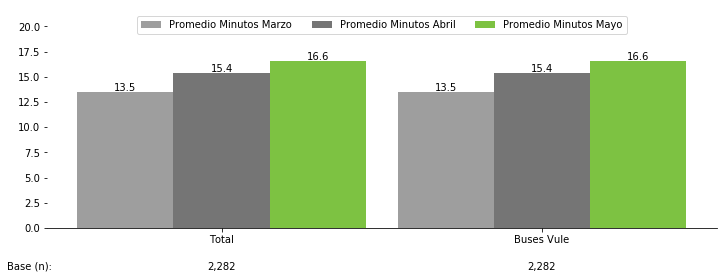

In [53]:
make_chart3(operadores, leyenda, data, colors, observaciones)

In [80]:
Meses

[8, 9, 10]

In [78]:
#Datos para evaluaciones por operador y mes
df1=df.groupby(['carrier', 'month'], as_index=False).agg({'evaluation':['mean']})
df2=df.groupby(['month'], as_index=False).agg({'evaluation':['mean']})
operadores=df.carrier.unique()
tiempos=[]
observaciones=[]
leyenda = ['Promedio Minutos Marzo', 'Promedio Minutos Abril', 'Promedio Minutos Mayo']
colors = ['#9E9E9E', '#757575', '#7DC242']
data = [[0 for _ in range(len(Meses))] for _ in range(len(operadores)+1)] 

observacion = df[['duration(min)']].count().values[0]
observaciones.append((round(observacion, 1)))

percentages = []       
for max_value in Meses:
    df3=df2[(df2['month']==max_value)]['evaluation']
    value=df3.iat[0,0]
    value=round(value,1)
    percentages.append(value)
    
for index, percentage in enumerate(percentages):
    data[0][index] = percentage 

for month_index, i in enumerate(operadores):
    percentages = []
    
    for max_value in Meses:
        df3=df1[(df1['month']==max_value) & (df1['carrier']==i)]['evaluation']
        value=df3.iat[0,0]
        value=round(value,1)
        percentages.append(value)
        
    for index, percentage in enumerate(percentages):
        data[month_index+1][index] = percentage 
        
    observacion = df[(df['carrier']==i)]['duration(min)'].count()
    observaciones.append((round(observacion, 1)))


operadores=['Total']
for i in list(df.carrier.unique()):
    operadores.append(i)

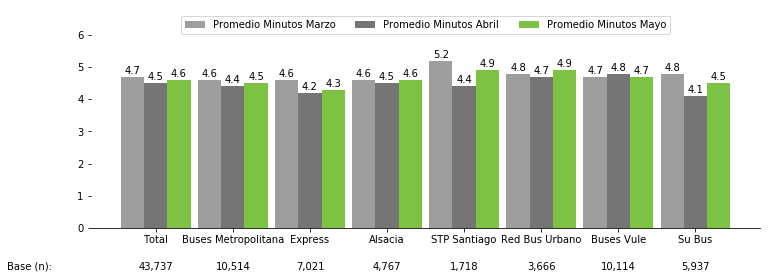

In [79]:
make_chart3(operadores, leyenda, data, colors, observaciones)

In [56]:
#Datos para evaluaciones por operador y mes con escala modificada
df1=df.groupby(['carrier', 'month'], as_index=False).agg({'evaluation_mod':['mean']})
df2=df.groupby(['month'], as_index=False).agg({'evaluation_mod':['mean']})
operadores=df.carrier.unique()
tiempos=[]
observaciones=[]
leyenda = ['Promedio Minutos Marzo', 'Promedio Minutos Abril', 'Promedio Minutos Mayo']
colors = ['#9E9E9E', '#757575', '#7DC242']
data = [[0 for _ in range(len(Meses))] for _ in range(len(operadores)+1)] 

observacion = df[['duration(min)']].count().values[0]
observaciones.append((round(observacion, 1)))

percentages = []       
for max_value in Meses:
    df3=df2[(df2['month']==max_value)]['evaluation_mod']
    value=df3.iat[0,0]
    value=round(value,1)
    percentages.append(value)
    
for index, percentage in enumerate(percentages):
    data[0][index] = percentage 

for month_index, i in enumerate(operadores):
    percentages = []
    
    for max_value in Meses:
        df3=df1[(df1['month']==max_value) & (df1['carrier']==i)]['evaluation_mod']
        value=df3.iat[0,0]
        value=round(value,1)
        percentages.append(value)
        
    for index, percentage in enumerate(percentages):
        data[month_index+1][index] = percentage 
        
    observacion = df[(df['carrier']==i)]['duration(min)'].count()
    observaciones.append((round(observacion, 1)))


operadores=['Total']
for i in list(df.carrier.unique()):
    operadores.append(i)

DataError: No numeric types to aggregate

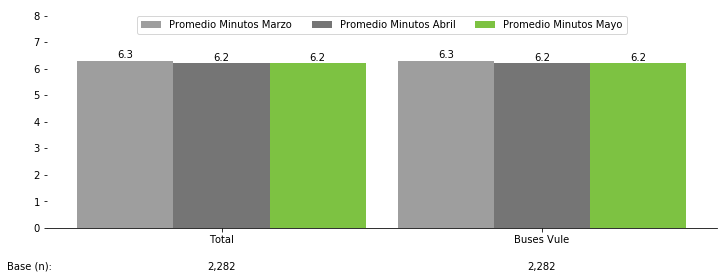

In [57]:
make_chart3(operadores, leyenda, data, colors, observaciones)

2.2 0.5 2.7 8 [0.  2.7 5.4]


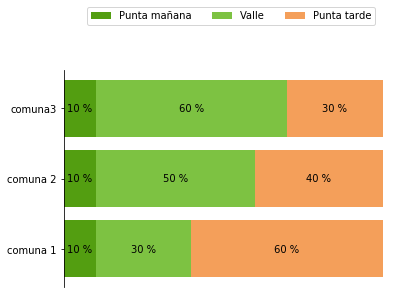

In [58]:
from operator import add

import matplotlib.pyplot as plt
import numpy as np

def make_horizontal_stacked_bars(legend, data, names, colors):
    """
    example of inputs:
        legend = ['Punta mañana', 'Valle', 'Punta tarde']
        data = [[10, 10, 10], [30, 50, 60], [60, 40, 30]]
        names = ["comuna 1", "comuna 2", "comuna3"]
        colors = ['#539e11', '#7DC242', '#f49f5a']
    """
    # sanity checks
    assert len(legend) == len(data)
    assert len(colors) == len(legend)
    for row in data:
        assert len(row) == len(names)
    
    ax = plt.subplot(111)
    
    bar_width = 2.2
    separator_width = 0.5
    start = 0
    step = bar_width + separator_width
    stop = int(step * len(names))
    y_base_positions = np.arange(start, stop, step)
    print(bar_width, separator_width, step, stop, y_base_positions)

    rectangles = []
    x_previous_position = [0 for _ in range(len(names))]
    previous_values = [0 for _ in range(len(names))]
    for index, (row, color) in enumerate(zip(data, colors)):
        chart = ax.barh(y_base_positions, width=row, left=x_previous_position, color=color, height=bar_width)
        rectangles.append(chart[0])
        
        # values
        for column, value in enumerate(row):
            ax.text(previous_values[column] + value / 2, y_base_positions[column], str(value) + ' %', color='black', 
                    horizontalalignment='center', verticalalignment='center')
            previous_values[column] += value

        x_previous_position = list(map(add, row, x_previous_position)) 
        
    ax.legend(rectangles, legend, loc='center', ncol = len(legend), bbox_to_anchor=(0.5, 1.25))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.axes.get_xaxis().set_visible(False)
    
    #plt.ylabel('Porcentaje')
    #plt.title('Tiempo de espera', loc='left')
    ax.set_yticklabels(names)
    ax.set_yticks(y_base_positions)
    
    plt.show()
########################################################################
# EXAMPLE
########################################################################


legend = ['Punta mañana', 'Valle', 'Punta tarde']
data = [[10, 10, 10], [30, 50, 60], [60, 40, 30]]
names = ["comuna 1", "comuna 2", "comuna3"]
colors = ['#539e11', '#7DC242', '#f49f5a']

make_horizontal_stacked_bars(legend, data, names, colors)

In [59]:
df['periodo']=df[['halfHourPeriod']].apply(lambda x: 'Punta Mañana' if ((x[0]<='08:30:00') & (x[0]>='06:30:00')) else ('Punta Tarde' if ((x[0]<='19:30:00') & (x[0]>='17:30:00')) else ( 'Nocturno'  if (((x[0]>'22:00:00') & (x[0]<'24:59:59')) | ((x[0]>='01:00:00') & (x[0]<'05:30:00'))) else  'Valle')), axis=1)

In [60]:
df.groupby(['carrier', 'periodo'], as_index=False).agg({'evaluation_mod':['count', 'mean']})

DataError: No numeric types to aggregate

In [74]:
#Datos para evaluaciones por operador y mes con escala modificada
df1=df.groupby(['carrier', 'periodo'], as_index=False).agg({'evaluation_mod':['mean']})
df2=df.groupby(['periodo'], as_index=False).agg({'evaluation_mod':['mean']})
operadores=df.carrier.unique()
tiempos=[]
observaciones=[]
leyenda = ['Punta Mañana', 'Punta Tarde', 'Valle', 'Nocturno']
Periodos=['Punta Mañana', 'Punta Tarde', 'Valle', 'Nocturno']
colors = ['#9E9E9E', '#757575', '#7DC242', 'green']
data = [[0 for _ in range(len(Periodos))] for _ in range(len(operadores)+1)] 

observacion = df[['duration(min)']].count().values[0]
observaciones.append((round(observacion, 1)))

percentages = []       
for max_value in Periodos:
    df3=df2[(df2['periodo']==max_value)]['evaluation_mod']
    value=df3.iat[0,0]
    value=round(value,1)
    percentages.append(value)
    
for index, percentage in enumerate(percentages):
    data[0][index] = percentage 

for month_index, i in enumerate(operadores):
    percentages = []
    
    for max_value in Periodos:
        df3=df1[(df1['periodo']==max_value) & (df1['carrier']==i)]['evaluation_mod']
        value=df3.iat[0,0]
        value=round(value,1)
        percentages.append(value)
        
    for index, percentage in enumerate(percentages):
        data[month_index+1][index] = percentage 
        
    observacion = df[(df['carrier']==i)]['duration(min)'].count()
    observaciones.append((round(observacion, 1)))


operadores=['Total']
for i in list(df.carrier.unique()):
    operadores.append(i)
    
make_chart3(operadores, leyenda, data, colors, observaciones)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [61]:
df.groupby(['periodo'], as_index=False).agg({'evaluation_mod':['count']})

,periodo,evaluation_mod
,,count
0,Nocturno,79
1,Punta Tarde,415
2,Valle,1788


In [68]:
test=df.groupby(['route', 'direction'], as_index=False ).agg({'evaluation_mod':'mean', 'tripId': 'count'})
test=test[test['tripId']>=50].sort_values(['evaluation_mod'], ascending=[True]).reset_index()
test = test.rename(columns={'route': 'Servicio', 'direction': 'Sentido', 'evaluation_mod': 'Sentido', 'tripId': 'Observaciones'})
test

,index,Servicio,Sentido,Sentido,Observaciones


In [69]:
test=df.groupby(['route', 'direction'], as_index=False ).agg({'evaluation_mod':'mean', 'tripId': 'count'})
test=test[test['tripId']>=50].sort_values(['evaluation_mod'], ascending=[False]).reset_index()
test = test.rename(columns={'route': 'Servicio', 'direction': 'Sentido', 'evaluation_mod': 'Sentido', 'tripId': 'Observaciones'})

In [70]:
tpos_viaje=df['duration(min)']

In [71]:
tpos_viaje.to_csv("tpo_etapas.csv", encoding='utf-8', index=False, sep=',')

In [72]:
comuna=df.groupby(['countyBegin'], as_index=False ).agg({'evaluation_mod':'mean', 'tripId': 'count'})
comuna=comuna.sort_values(['evaluation_mod'], ascending=[False]).reset_index()
comuna= comuna.rename(columns={'countyBegin': 'Comuna', 'evaluation_mod': 'Evaluacion', 'tripId': 'Cantidad'})
comuna

,index,Comuna,Evaluacion,Cantidad
0,17,PENALOLEN,6.000000,2
1,19,PUDAHUEL,6.000000,5
2,9,LA PINTANA,6.000000,3
3,1,CERRO NAVIA,6.000000,1
4,15,PADRE HURTADO,6.000000,1
5,13,MAIPU,5.611111,432
6,27,SAN RAMON,5.578947,19
7,7,LA FLORIDA,5.565684,373
8,4,ESTACION CENTRAL,5.547826,115
9,22,RECOLETA,5.500000,4


In [73]:
comuna.to_csv("eva_comunas.csv", encoding='utf-8', index=False, sep=',')